<a href="https://colab.research.google.com/github/thompf2/Machine-Learning-Engineering/blob/main/MLE_Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HOMEWORK #3

FAYDIA THOMPSON (RIN: 662020314)

PROBLEM 1:


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


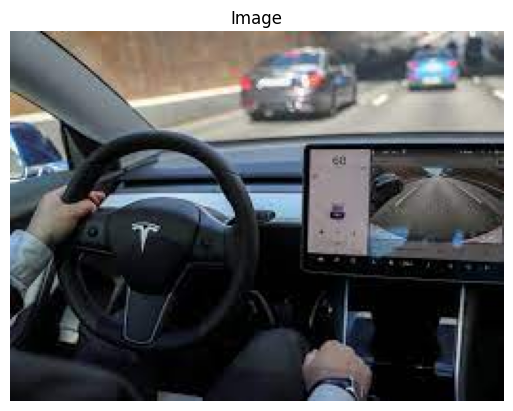

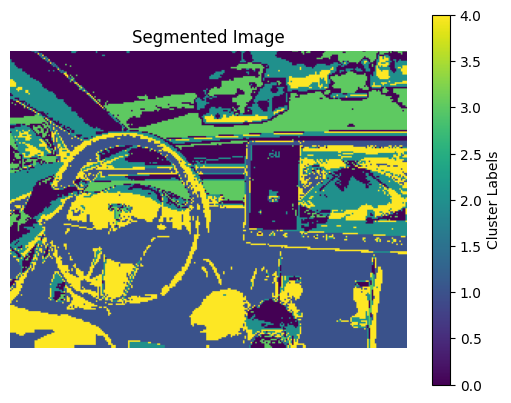

In [6]:
from skimage import io
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# mount Google Drive
drive.mount('/content/drive')

# file path in Google Drive
file_path = '/content/drive/My Drive/Machine Learning Engineering/seg2.jpg'

# load and display the image
image = io.imread(file_path)
plt.imshow(image)
plt.title('Image')
plt.axis('off')
plt.show()

# reshape the image into (num_pixels, 3)
pixels = image.reshape(-1, 3)

# apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=127)
kmeans.fit(pixels)

# get cluster labels and reshape them back to image dimensions
segmented_img = kmeans.labels_.reshape(image.shape[:2])

# display the segmented image and store the mappable object
img = plt.imshow(segmented_img, cmap='viridis')
plt.title('Segmented Image')
plt.axis('off')

# add colorbar linked to the mappable 'img'
plt.colorbar(img, label='Cluster Labels')
plt.show()


PROBLEM 2:

The estimated price for a city with a population of 160,000 is $139792.31

When the batch size is 1 (stochastic gradient descent), updates occur after each individual sample, leading to a higher number of iterations. The cost function plot becomes spikier due to the noisy updates, with frequent fluctuations. However, it tends to condense more quickly in lower cost values as the model adjusts rapidly.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


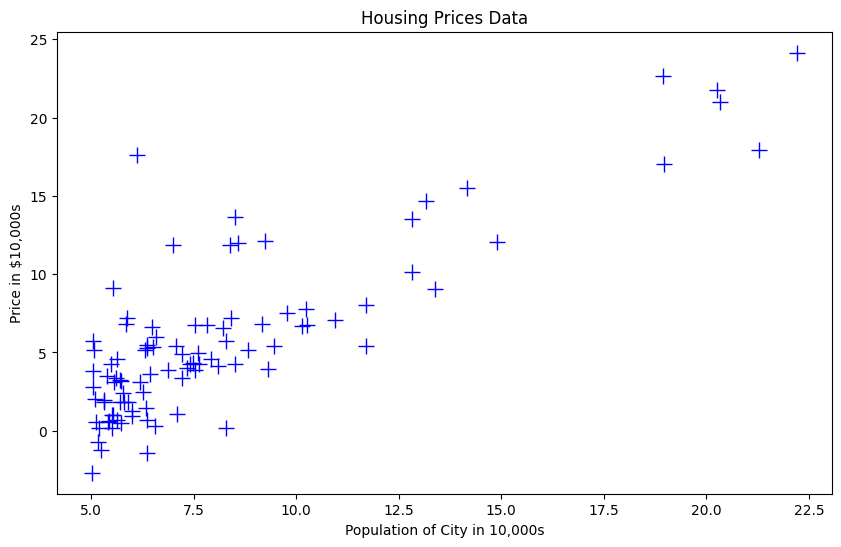

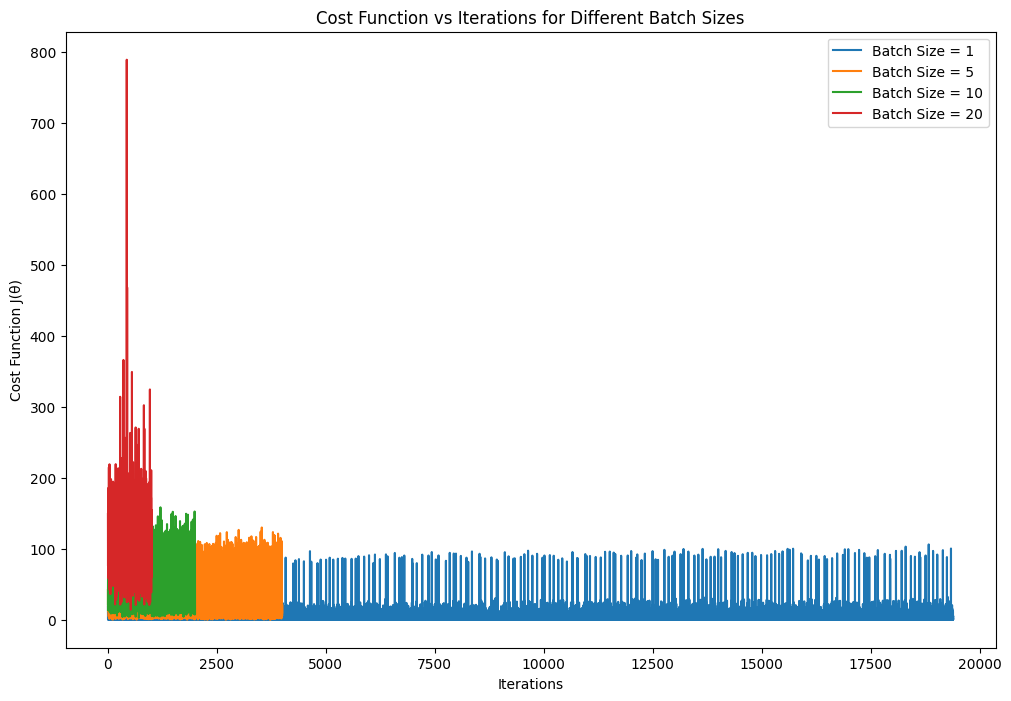

Estimated price for a city with 160,000 people: $139792.31


In [17]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Machine Learning Engineering/housing_prices.txt'

# Load data
cols = np.loadtxt(file_path, delimiter=',', usecols=(0, 1), unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size

# Add intercept term to X
X = np.insert(X, 0, 1, axis=1)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(X[:, 1], y[:, 0], 'b+', markersize=12)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')
plt.title('Housing Prices Data')
plt.show()

def hypothesis(X, theta):
    return np.dot(X, theta)

# Function to compute gradient of error function w.r.t. theta
def gradient(X, y, theta):
    h = hypothesis(X, theta)
    grad = np.dot(X.T, (h - y))
    return grad

# Function to compute the error for current values of theta
def cost(X, y, theta):
    h = hypothesis(X, theta)
    J = np.dot((h - y).T, (h - y)) / 2
    return J[0, 0]

# Function to create mini-batches
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size

    for i in range(n_minibatches):
        mini_batch = data[i * batch_size:(i + 1) * batch_size, :]
        X_mini = mini_batch[:, :-1]
        y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, y_mini))

    if data.shape[0] % batch_size != 0:
        mini_batch = data[n_minibatches * batch_size:, :]
        X_mini = mini_batch[:, :-1]
        y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, y_mini))

    return mini_batches

# mini-batch Gradient Descent
def gradientDescent(X, y, learning_rate=0.001, batch_size=32, epochs=200):
    theta = np.zeros((X.shape[1], 1))
    error_list = []

    for epoch in range(epochs):  # Loop over epochs
        mini_batches = create_mini_batches(X, y, batch_size)
        for X_mini, y_mini in mini_batches:
            theta -= learning_rate * gradient(X_mini, y_mini, theta)
            error_list.append(cost(X_mini, y_mini, theta))

    return theta, error_list

# Hyperparameters
batch_sizes = [1, 5, 10, 20]
learning_rate = 0.001
epochs = 200

# Plotting Cost Function for Different Batch Sizes
plt.figure(figsize=(12, 8))
for batch_size in batch_sizes:
    theta, error_list = gradientDescent(X, y, learning_rate, batch_size, epochs)
    plt.plot(range(len(error_list)), error_list, label=f'Batch Size = {batch_size}')

plt.xlabel("Iterations")  # Each mini-batch update counts as one iteration
plt.ylabel("Cost Function J(θ)")
plt.title("Cost Function vs Iterations for Different Batch Sizes")
plt.legend()
plt.show()

# Estimate price for population of 160,000
price_estimate = predict(theta, 160000)
print(f"Estimated price for a city with 160,000 people: ${price_estimate * 10000:.2f}")


PROBLEM 3:

The best two features to perform the classification are worst radius and worst concavity.

Accuracy: 0.9532163742690059


Precision: 0.9459459459459459


Recall: 0.9813084112149533


F1 Score: 0.963302752293578







Number of features: 30
Selected feature indices: [20 26]
Selected feature names: ['worst radius' 'worst concavity']
Accuracy: 0.9532163742690059
Precision: 0.9459459459459459
Recall: 0.9813084112149533
F1 Score: 0.963302752293578

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        64
           1       0.95      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



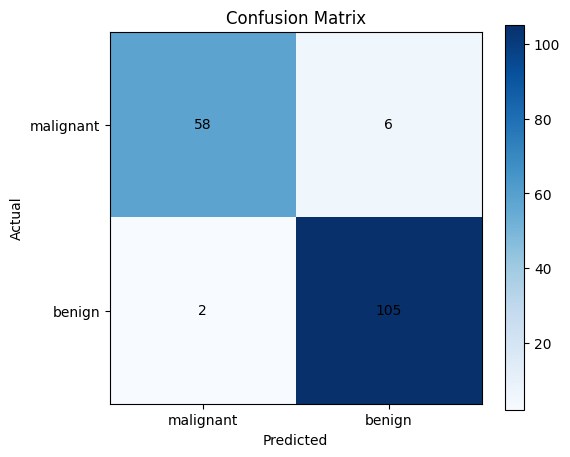

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# load dataset
breastcancer = load_breast_cancer()
X = breastcancer.data               # use ALL features
y = breastcancer.target             # use ALL target labels
print("Number of features:", X.shape[1])  # check how many features there are

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, train_size=0.70, random_state=123, stratify=y)


# logistic Regression Model
log_reg = LogisticRegression(max_iter=10000, solver='liblinear')  # use liblinear for small datasets

# apply RFE to select top 2 features
rfe = RFE(estimator=log_reg, n_features_to_select=2)
rfe.fit(X_train, y_train)

# selected features
selected_features = np.where(rfe.support_ == True)[0]
print("Selected feature indices:", selected_features)
print("Selected feature names:", breastcancer.feature_names[selected_features])


# train with only the selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

log_reg.fit(X_train_selected, y_train)
y_pred = log_reg.predict(X_test_selected)


# classification metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()
plt.xticks([0, 1], breastcancer.target_names)
plt.yticks([0, 1], breastcancer.target_names)

# add counts to each cell
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()







PROBLEM 4:

The price of a house in a city with a population of 165,000 is $161,769.45

The training and validation losses decrease rapidly in the first few epochs as the model quickly learns key patterns in the data. After this initial phase, the losses plateau with minor fluctuations, indicating the model is fine-tuning its performance. The training loss converges slightly lower than the validation loss, which is expected since the model fits the training data more closely. The small gap between the two suggests good generalization without significant overfitting.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


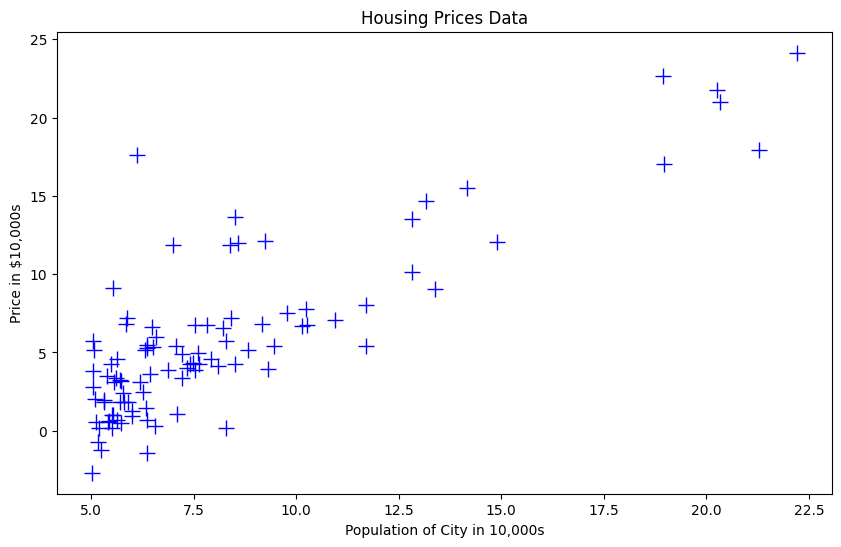

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


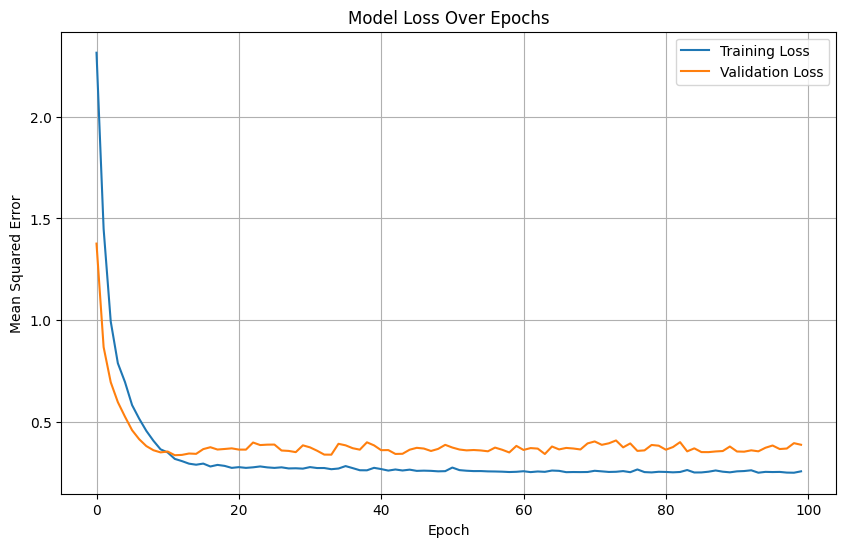

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted price for a city with population 165,000: $161769.45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
R-squared score on the test set: 0.5628


In [13]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


# Mount Google Drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Machine Learning Engineering/housing_prices.txt'

cols = np.loadtxt(file_path,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'b+',markersize=12)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')
plt.title('Housing Prices Data')
plt.show()

# Train-Test Split (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)  # Fixed here

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Neural Network Model
model = Sequential([
    Dense(2, activation='relu', input_shape=(2,)),  # Changed input_shape to (2,)
    Dense(1)
])


# Optimizer and Loss Function
optimizer = SGD(learning_rate=0.05)
model.compile(optimizer=optimizer, loss='mse')

# Training the Model
history = model.fit(X_train_scaled, y_train_scaled, validation_data=(X_test_scaled, y_test_scaled), epochs=100, verbose=0)

# Plotting Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# Predicting the Price for a City with 165,000 Population
predicted_price_scaled = model.predict(scaler_X.transform([[1, 16.5]]))  # Added 1 for bias term
predicted_price = scaler_y.inverse_transform(predicted_price_scaled)
print(f'Predicted price for a city with population 165,000: ${predicted_price[0][0] * 10_000:.2f}')

# Regression Metric: R-squared
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test_scaled, y_pred)
print(f'R-squared score on the test set: {r2:.4f}')
